<a href="https://colab.research.google.com/github/evilla-19/keras_MNIST_demo/blob/master/keras_MNIST_deeper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following https://www.youtube.com/watch?v=lOZGYzTn9Z8

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
# set-up to upload from google drive, part 2
import os
!pip3 install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# set-up to upload from google drive, part 3
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# actually get the files
!mkdir /content/inputData
%cd /content/inputData
download = drive.CreateFile({'id': '1TKQb-Ayc1W5aEA-sKYKPcexOwDntyDgZ'})
download.GetContentFile('fashion-mnist_test.csv')
download = drive.CreateFile({'id': '13Pye-aQ9chnOTo_dBWGha9zG2IuZq_yQ'})
download.GetContentFile('fashion-mnist_train.csv')

mkdir: cannot create directory ‘/content/inputData’: File exists
/content/inputData


In [0]:
# split the training and testing data into X (image) and Y (label) arrays

train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

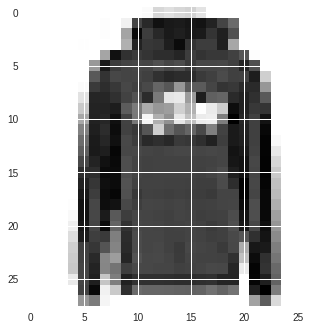

In [0]:
# lets see what the images look like

image = x_train[53, :].reshape((28, 28))

plt.imshow(image)
plt.show()

  

In [0]:
# reshape the data

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)


print('X train shape is: {}'.format(x_train.shape))
print('Y train shape is: {}'.format(y_train.shape))

print('A peek into X train: {}'.format(x_train[0]))
print('A peek into Y train: {}'.format(y_train[0]))

X train shape is: (48000, 28, 28, 1)
Y train shape is: (48000,)
A peek into X train: [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5764706 ]
  [0.18039216]
  [0.49019608]
  [0.5647059 ]
  [0.42745098]
  [0.33333334]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.10196079]
  [0.21568628]
  [0.8862745 ]
  [0.8       ]
  [0.63529414]
  [0.6431373 ]
  [0.827451  ]
  [0.972549  ]
  [0.03921569]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.      

In [0]:
# !pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://6125f185.ngrok.io


In [0]:
# Define the model

cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [0]:
# print(cnn_model.layers)

from keras.utils import plot_model
plot_model(cnn_model, to_file='cnn_model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# Compile and fit the model

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=30, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[TensorBoardColabCallback(tbc)]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 39us/step - loss: 0.7682 - acc: 0.7514 - val_loss: 0.4545 - val_acc: 0.8443
Epoch 2/30
48000/48000 [==============================] - 2s 33us/step - loss: 0.4225 - acc: 0.8520 - val_loss: 0.3833 - val_acc: 0.8652
Epoch 3/30
48000/48000 [==============================] - 2s 32us/step - loss: 0.3745 - acc: 0.8695 - val_loss: 0.3455 - val_acc: 0.8792
Epoch 4/30
48000/48000 [==============================] - 2s 32us/step - loss: 0.3447 - acc: 0.8786 - val_loss: 0.3275 - val_acc: 0.8866
Epoch 5/30
48000/48000 [==============================] - 2s 32us/step - loss: 0.3237 - acc: 0.8870 - val_loss: 0.3185 - val_acc: 0.8866
Epoch 6/30
48000/48000 [==============================] - 2s 32us/step - loss: 0.3118 - acc: 0.8906 - val_loss: 0.3021 - val_acc: 0.8928
Epoch 7/30
48000/48000 [==============================] - 2s 32us/step - loss: 0.3001 - acc: 0.8945 - val_loss: 0.2938 - val_acc

In [0]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2336
 test acc: 0.9160


In [0]:
score

[0.2336172239780426, 0.916]

In [0]:
# our 3 models 

name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [0]:
# the model summaries

for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [0]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(x_validate, y_validate),
        callbacks = [TensorBoardColabCallback(tbc)]
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.1341 - acc: 0.9515 - val_loss: 0.2484 - val_acc: 0.9187
Epoch 2/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1272 - acc: 0.9537 - val_loss: 0.2518 - val_acc: 0.9205
Epoch 3/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1281 - acc: 0.9537 - val_loss: 0.2507 - val_acc: 0.9204
Epoch 4/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1249 - acc: 0.9541 - val_loss: 0.2500 - val_acc: 0.9213
Epoch 5/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1246 - acc: 0.9544 - val_loss: 0.2536 - val_acc: 0.9186
Epoch 6/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1211 - acc: 0.9557 - val_loss: 0.2525 - val_acc: 0.9193
Epoch 7/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.1202 - acc: 0.9565 - val_loss: 0.2572 - val_acc

In [0]:
for model in cnn_models:
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss of {} is : {}'.format(model.name, score[0]))
  print('Test accuracy of {} is : {}'.format(model.name, score[1]))





Test loss of 1_Layer is : 0.25832980531454086
Test accuracy of 1_Layer is : 0.9221
Test loss of 2_Layer is : 0.2024188457608223
Test accuracy of 2_Layer is : 0.9309
Test loss of 3_layer is : 0.22538819749355316
Test accuracy of 3_layer is : 0.9148


In [0]:
cnn_model_3.layers[-1].trainable = False



In [0]:
x = cnn_model_3.output

x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])